In [ ]:
import matplotlib.pyplot as plt
import umap
import pandas as pd
import numpy as np

In [ ]:
!pip uninstall umap

Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/umap/__pycache__/layouts.rdist-29.py37m.1.nbc
    /usr/local/lib/python3.7/dist-packages/umap/__pycache__/layouts.rdist-29.py37m.nbi
    /usr/local/lib/python3.7/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/distances.py
    /usr/local/lib/python3.7/dist-packages/umap/layouts.py
    /usr/local/lib/python3.7/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/plot.py
    /usr/local/lib/python3.7/dist-packages/umap/sparse.py
    /usr/local/lib/python3.7/dist-packages/umap/spectral.py
    /usr/local/lib/python3.7/dist-packages/umap/umap_.py
    /usr/local/lib/python3.7/dist-packages/umap/utils.py
    /usr/local/lib/python3.7/dist-packages/umap/validation.py
Proceed (y/n)? y
  S

In [ ]:

!pip install umap-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sentence Embeddings/SAMPLES/BERT/samp_train_bert.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Sentence Embeddings/SAMPLES/BERT/samp_test_bert.csv')

FOR 10000 SAMPLES


In [ ]:
sarc = {'normal':0,'sarcasm':1}
sent = {'VNeg':0,'Neg':1,'Neu':2,'Pos':3,'VPos':4}
df['sarc'] = df['sarcasm'].apply(lambda x: sarc[x])
df1['sarc'] = df1['sarcasm'].apply(lambda x: sarc[x])

df['sent'] = df['final_sent_class'].apply(lambda x: sent[x])
df1['sent'] = df1['final_sent_class'].apply(lambda x: sent[x])
# df_test = df[df['train/test'] == 1]

In [ ]:
df1

,id,BERT_embed,sarcasm,final_sent_class,sarc,sent
0,1251695486131527680,"[0.1971338838338852, -0.26955828070640564, 0.2...",sarcasm,Neg,1,1
1,1253449530294644743,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Pos,0,3
2,1249909785866035200,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Neu,0,2
3,1239810136253792257,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Pos,0,3
4,1253085327553634309,"[0.1971338838338852, -0.26955828070640564, 0.2...",sarcasm,Pos,1,3
...,...,...,...,...,...,...
481,1249550632907759621,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Neg,0,1
482,1255925843882315776,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Neu,0,2
483,1256098747165085698,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Neu,0,2
484,1246130199604989953,"[0.1971338838338852, -0.26955828070640564, 0.2...",normal,Pos,0,3


In [ ]:
import json
df['BERT_embed'] = df['BERT_embed'].apply(lambda x: json.loads(x))
df1['BERT_embed'] = df1['BERT_embed'].apply(lambda x: json.loads(x))


In [ ]:
df['array'] = df.BERT_embed.apply(lambda x: np.array(x))

In [ ]:
mat = np.matrix([x for x in df.array])

In [ ]:
df1['array'] = df1.BERT_embed.apply(lambda x: np.array(x))
mat1 = np.matrix([x for x in df1.array])

In [ ]:
y_tr_sarc = df['sarc'].to_numpy()
y_tr_sent = df['sent'].to_numpy()
y_ts_sarc = df1['sarc'].to_numpy()
y_ts_sent = df1['sent'].to_numpy()

In [ ]:
y_tr_sent

In [ ]:
df_train = df[df['train/test'] == 0]

In [ ]:
df_tr = df_train.sample(5000)
df_ts = df_test.sample(5000)

In [ ]:
x = df_tr.to_numpy()
y = df_ts.to_numpy()

In [ ]:
tot = np.concatenate((x,y),axis=0)

In [ ]:
df_samp = pd.DataFrame(tot,columns = list(df.columns))

In [ ]:
X = df_samp.iloc[:,:-2].to_numpy()

In [ ]:
y = df_samp.iloc[:,-2:-1].to_numpy().flatten()

In [ ]:
comb_mat = np.concatenate((mat,mat1),axis = 0)

In [ ]:
comb_y_sarc = np.concatenate((y_tr_sarc,y_ts_sarc),axis = 0)
comb_y_sent = np.concatenate((y_tr_sent,y_ts_sent),axis = 0)

In [ ]:
comb_y_sent.shape

(957,)

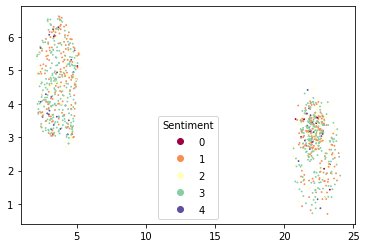

In [ ]:
# plt.figure(figsize=(25,25))
standard_embedding = umap.UMAP(random_state=42).fit_transform(comb_mat)
s = plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=comb_y_sent, s=0.7, cmap='Spectral');
plt.legend(*s.legend_elements(),title = "Sentiment")

In [ ]:
clusterable_embedding = umap.UMAP(n_neighbors=30,min_dist=0.2,n_components=2).fit_transform(comb_mat)

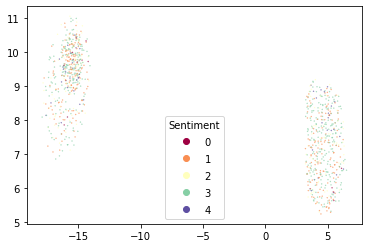

In [ ]:
# plt.figure(figsize=(25, 25))
s = plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=comb_y_sent, s=0.1, cmap='Spectral');
plt.legend(*s.legend_elements(),title = "Sentiment")

In [ ]:
import sklearn.cluster as cluster
lbls = cluster.KMeans(n_clusters=5).fit_predict(clusterable_embedding)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


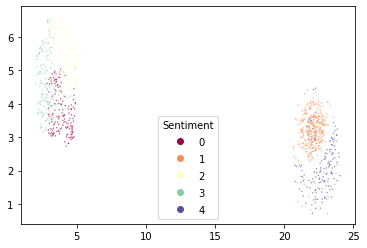

In [ ]:
# plt.figure(figsize=(25, 25))
clustered = (lbls >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)


s = plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=lbls[clustered],
            s=0.1,
            cmap='Spectral');
plt.legend(*s.legend_elements(),title = "Sentiment")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


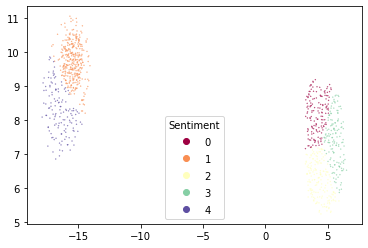

In [ ]:
# clustered = (lbls >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)


s = plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=lbls[clustered],
            s=0.1,
            cmap='Spectral');
plt.legend(*s.legend_elements(),title = "Sentiment")

ENTIRE DATASET

In [ ]:
X_ent = df.iloc[:,:-2].to_numpy()
y_ent = df.iloc[:,-2:-1].to_numpy().flatten()

In [ ]:
plt.figure(figsize=(50, 50))

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [ ]:
standard_embedding_ent = umap.UMAP(random_state=42).fit_transform(X_ent)


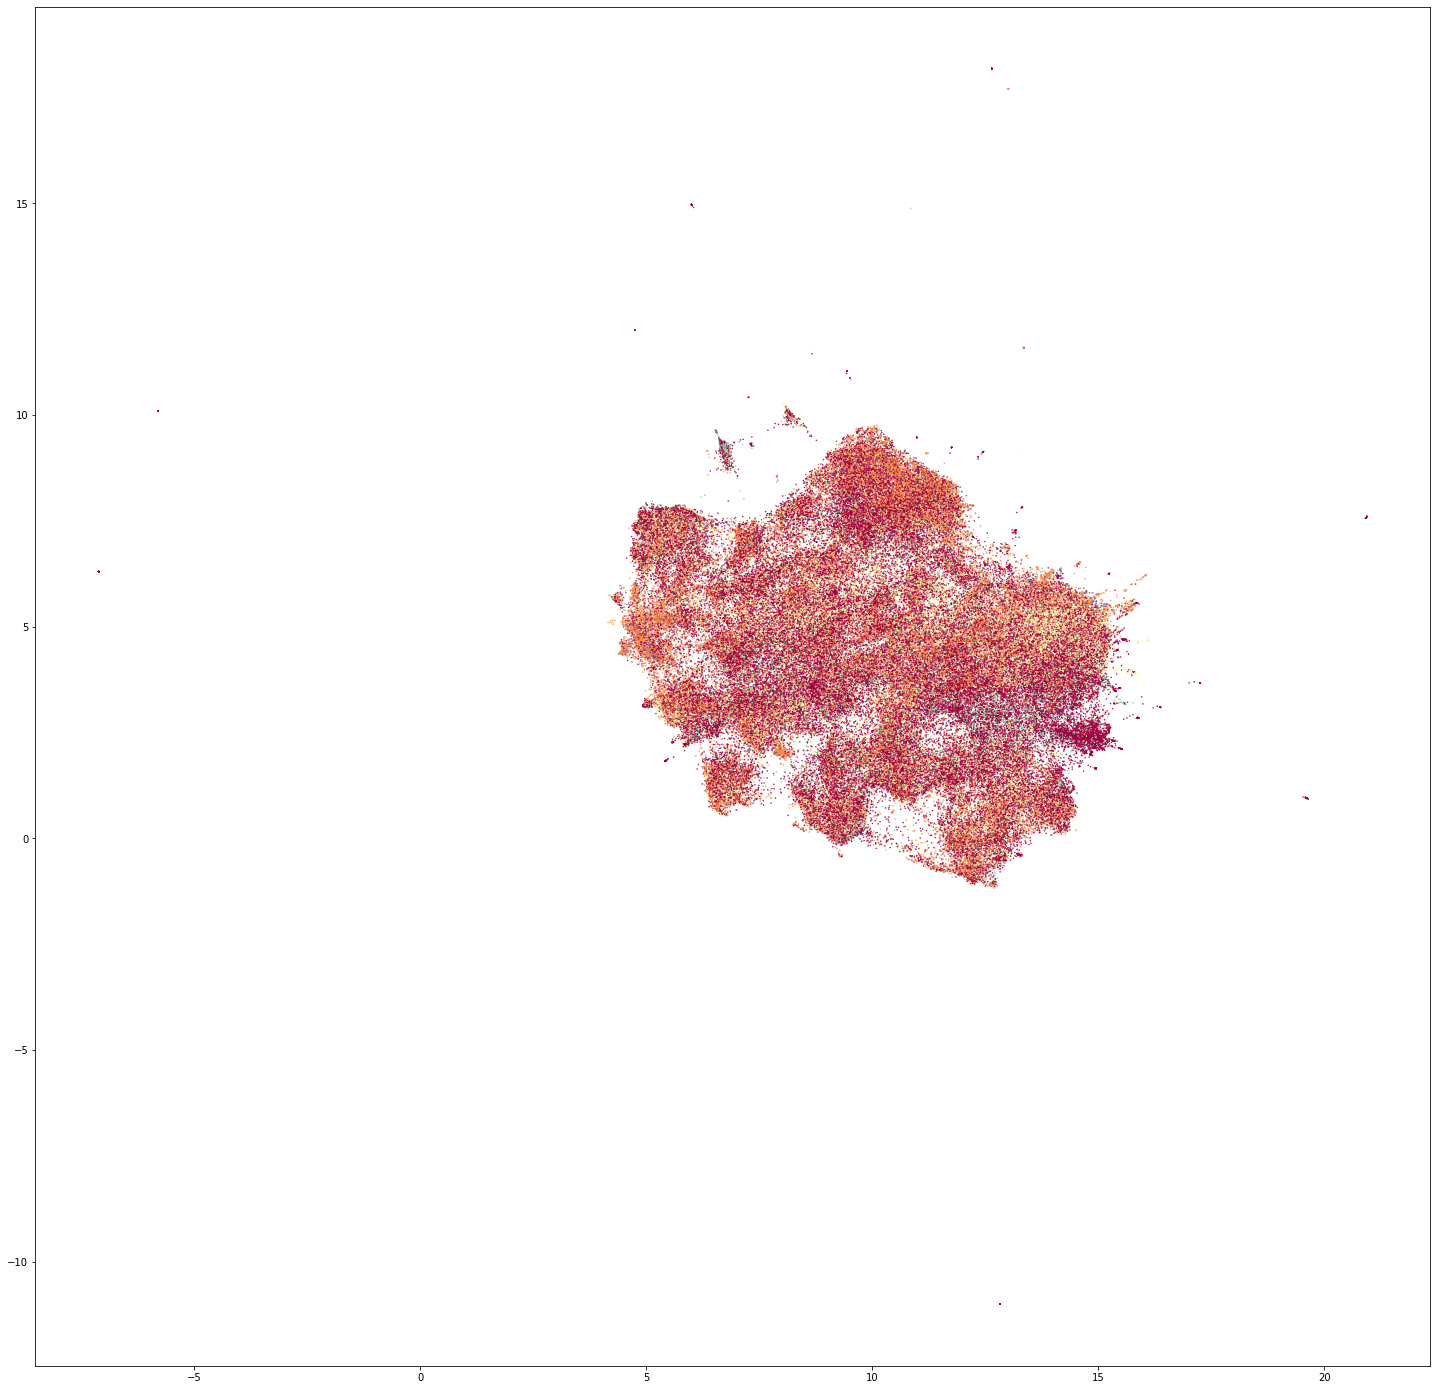

In [ ]:
plt.figure(figsize=(25, 25))
plt.scatter(standard_embedding_ent[:, 0], standard_embedding_ent[:, 1], c=y_ent, s=0.25, cmap='Spectral');

In [ ]:
clusterable_embedding_ent = umap.UMAP(
    n_neighbors=30,
    min_dist=0.2,
    n_components=2,
).fit_transform(X_ent)

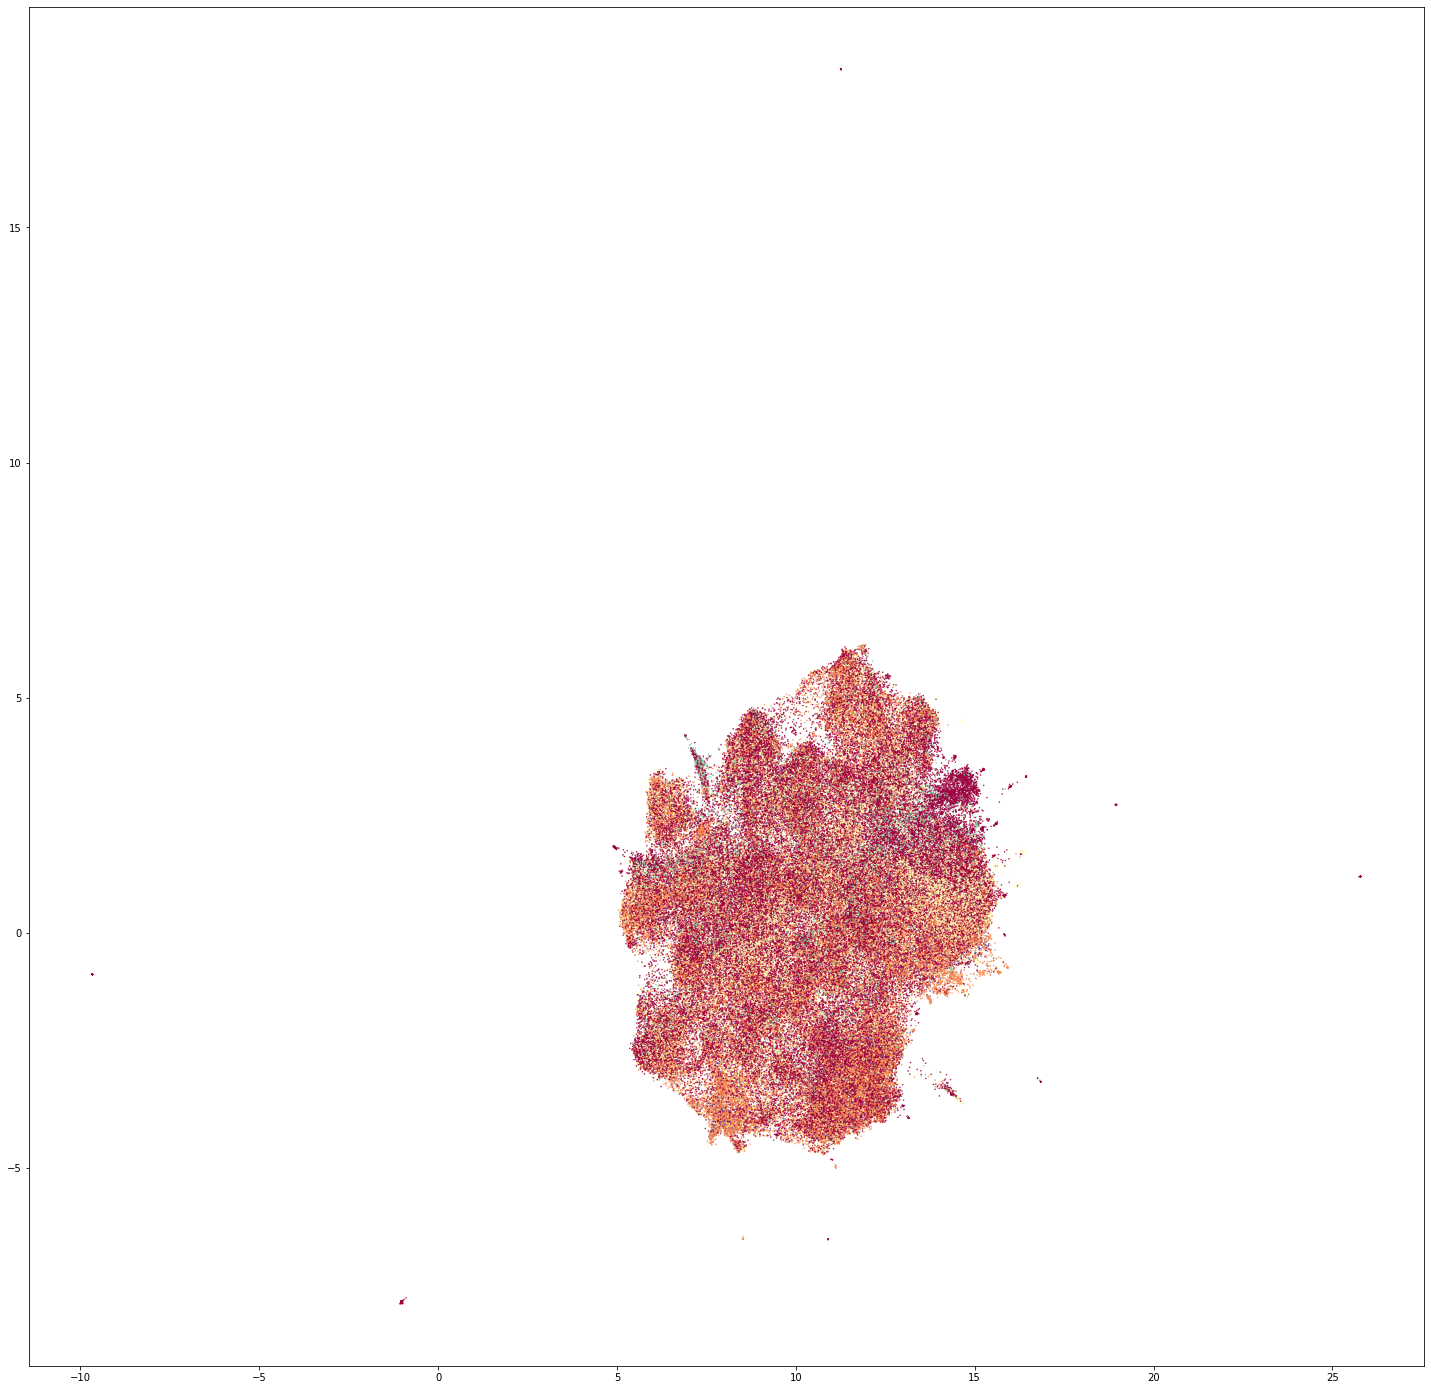

In [ ]:
plt.figure(figsize=(25, 25))
plt.scatter(clusterable_embedding_ent[:, 0], clusterable_embedding_ent[:, 1],
            c=y_ent, s=0.25, cmap='Spectral');

In [ ]:
lbls_ent = cluster.KMeans(n_clusters=5).fit_predict(clusterable_embedding_ent)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


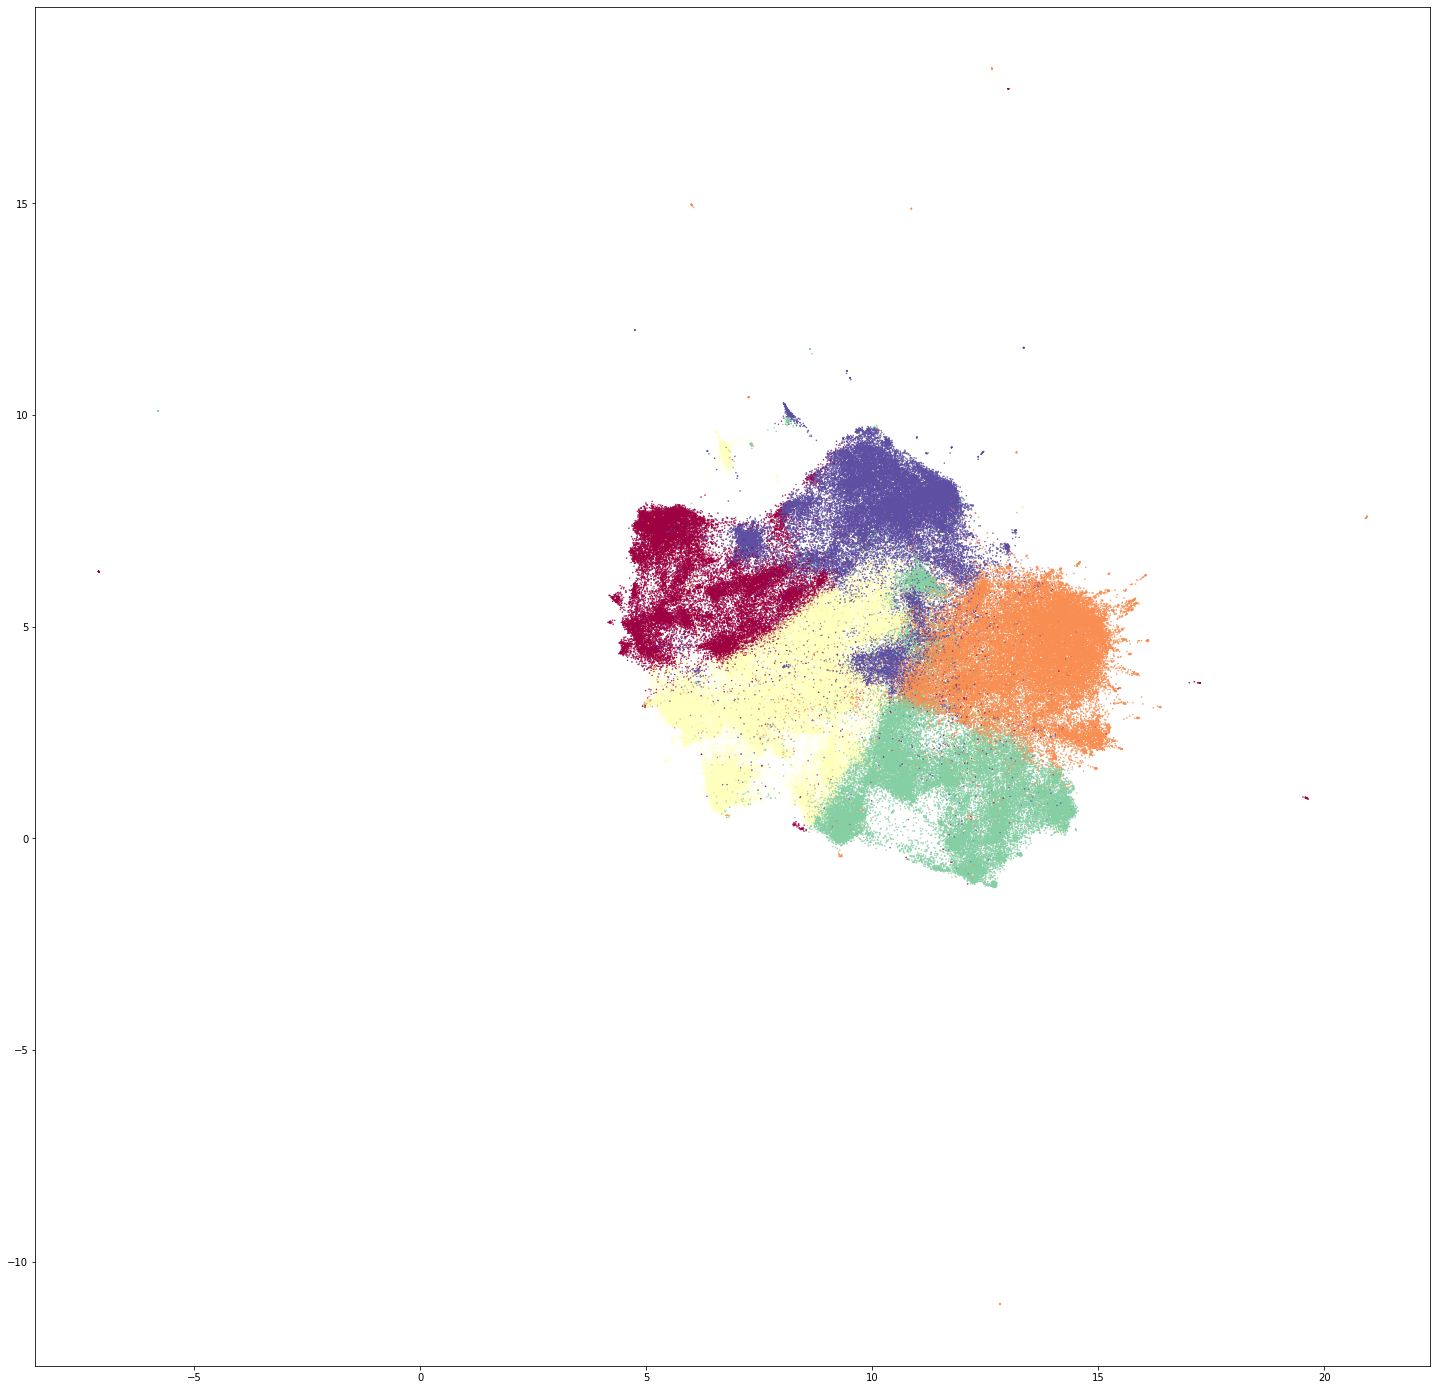

In [ ]:
plt.figure(figsize=(25, 25))
clustered_ent = (lbls_ent >= 0)
plt.scatter(standard_embedding_ent[~clustered_ent, 0],
            standard_embedding_ent[~clustered_ent, 1],
            c=(0.5, 0.5, 0.5),
            s=0.25,
            alpha=0.5)


plt.scatter(standard_embedding_ent[clustered_ent, 0],
            standard_embedding_ent[clustered_ent, 1],
            c=lbls_ent[clustered_ent],
            s=0.25,
            cmap='Spectral');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


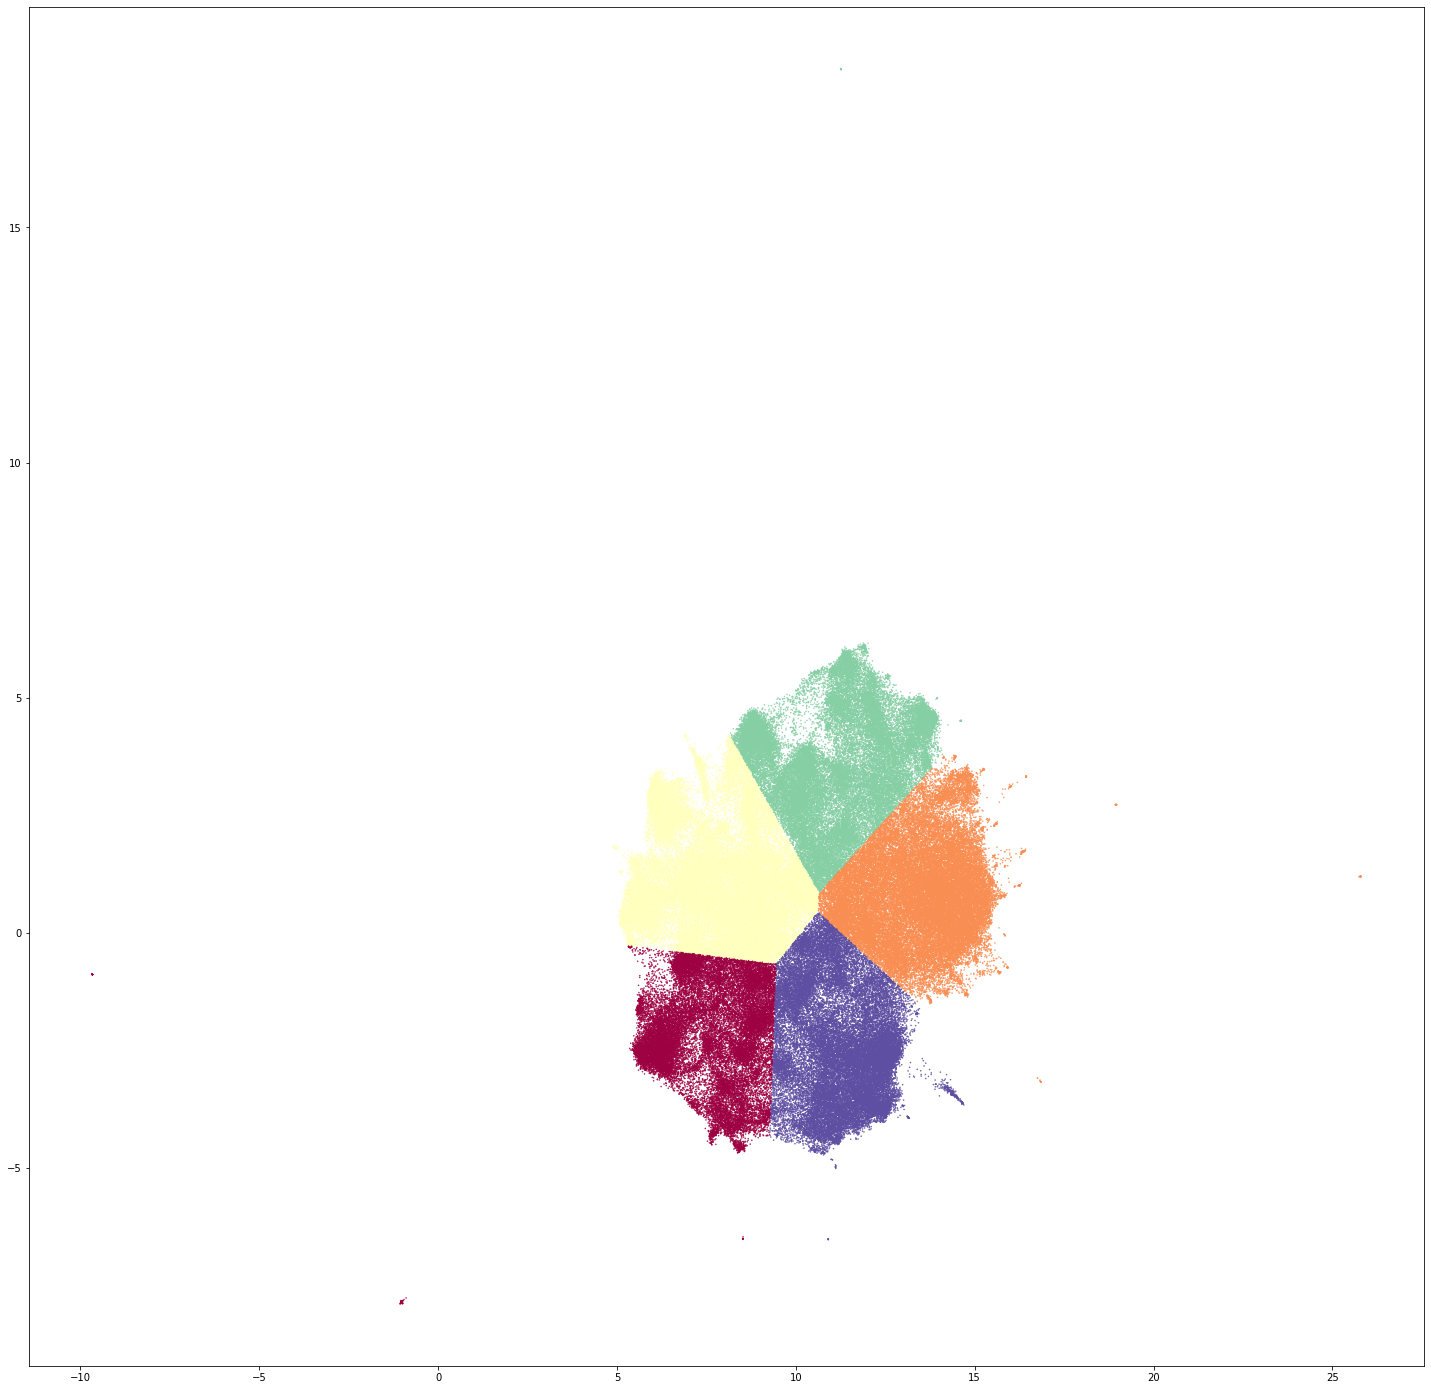

In [ ]:
plt.figure(figsize=(25, 25))
plt.scatter(clusterable_embedding_ent[~clustered_ent, 0],
            clusterable_embedding_ent[~clustered_ent, 1],
            c=(0.5, 0.5, 0.5),
            s=0.25,
            alpha=0.5)


plt.scatter(clusterable_embedding_ent[clustered_ent, 0],
            clusterable_embedding_ent[clustered_ent, 1],
            c=lbls_ent[clustered_ent],
            s=0.25,
            cmap='Spectral');